In [1]:
import import_ipynb
from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from aqi_epa_pm25.ipynb
PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_2BBA    float64
TANGARA_260A    float64
TANGARA_4B1A    float64
TANGARA_1EE6    float64
TANGARA_2B42    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_307A    float64
TANGARA_1712    float64
TANGARA_48C6    float64
TANGARA_532E    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
dtype: object


,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,
2023-10-05 19:34:30-05:00,4.0,3.0,NaN,11.0,3.0,13.0,3.0,12.0,14.0,3.0,16.0,3.0,0.0
2023-10-05 19:35:00-05:00,4.0,3.0,6.0,9.0,3.0,12.0,3.0,11.0,13.0,5.0,14.0,2.0,0.0
2023-10-05 19:35:30-05:00,4.0,3.0,7.0,9.0,3.0,12.0,4.0,11.0,13.0,4.0,15.0,2.0,0.0
2023-10-05 19:36:00-05:00,4.0,3.0,NaN,9.0,3.0,13.0,4.0,11.0,11.0,6.0,15.0,NaN,0.0
2023-10-05 19:36:30-05:00,3.0,4.0,7.0,7.0,4.0,13.0,4.0,11.0,12.0,5.0,15.0,3.0,0.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,10.000000,9.000000,7.000000,10.000000,10.000000,9.000000,9.000000,9.000000,10.000000,9.000000,10.000000,9.000000,10.0
mean,3.700000,3.444444,6.142857,8.400000,4.800000,12.222222,3.777778,11.222222,13.000000,4.111111,13.800000,2.777778,0.0
std,0.483046,0.527046,0.899735,1.264911,1.932184,0.666667,0.440959,0.440959,0.942809,1.166667,2.250926,0.440959,0.0
min,3.000000,3.000000,5.000000,7.000000,3.000000,11.000000,3.000000,11.000000,11.000000,3.000000,10.000000,2.000000,0.0
25%,3.250000,3.000000,5.500000,7.250000,3.000000,12.000000,4.000000,11.000000,13.000000,3.000000,11.750000,3.000000,0.0
50%,4.000000,3.000000,6.000000,8.500000,4.500000,12.000000,4.000000,11.000000,13.000000,4.000000,15.000000,3.000000,0.0
75%,4.000000,4.000000,7.000000,9.000000,6.500000,13.000000,4.000000,11.000000,13.750000,5.000000,15.000000,3.000000,0.0
max,4.000000,4.000000,7.000000,11.000000,8.000000,13.000000,4.000000,12.000000,14.000000,6.000000,16.000000,3.000000,0.0


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,
2023-10-05 19:34:30-05:00,17.0,13.0,NaN,46.0,13.0,53.0,13.0,50.0,55.0,13.0,60.0,13.0,0.0
2023-10-05 19:35:00-05:00,17.0,13.0,25.0,38.0,13.0,50.0,13.0,46.0,53.0,21.0,55.0,9.0,0.0
2023-10-05 19:35:30-05:00,17.0,13.0,30.0,38.0,13.0,50.0,17.0,46.0,53.0,17.0,58.0,9.0,0.0
2023-10-05 19:36:00-05:00,17.0,13.0,NaN,38.0,13.0,53.0,17.0,46.0,46.0,25.0,58.0,NaN,0.0
2023-10-05 19:36:30-05:00,13.0,17.0,30.0,30.0,17.0,53.0,17.0,46.0,50.0,21.0,58.0,13.0,0.0


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,10.000000,9.000000,7.000000,10.000000,10.000000,9.000000,9.000000,9.000000,10.00000,9.000000,10.000000,9.000000,10.0
mean,15.800000,14.777778,26.000000,35.600000,20.500000,50.555556,16.111111,46.888889,52.60000,17.444444,54.100000,12.111111,0.0
std,1.932184,2.108185,4.082483,5.059644,8.168367,2.242271,1.763834,1.763834,2.75681,4.666667,6.740425,1.763834,0.0
min,13.000000,13.000000,21.000000,30.000000,13.000000,46.000000,13.000000,46.000000,46.00000,13.000000,42.000000,9.000000,0.0
25%,14.000000,13.000000,23.000000,31.000000,13.000000,50.000000,17.000000,46.000000,53.00000,13.000000,48.250000,13.000000,0.0
50%,17.000000,13.000000,25.000000,36.000000,19.000000,50.000000,17.000000,46.000000,53.00000,17.000000,58.000000,13.000000,0.0
75%,17.000000,17.000000,30.000000,38.000000,27.750000,53.000000,17.000000,46.000000,54.50000,21.000000,58.000000,13.000000,0.0
max,17.000000,17.000000,30.000000,46.000000,34.000000,53.000000,17.000000,50.000000,55.00000,25.000000,60.000000,13.000000,0.0


## Histograms

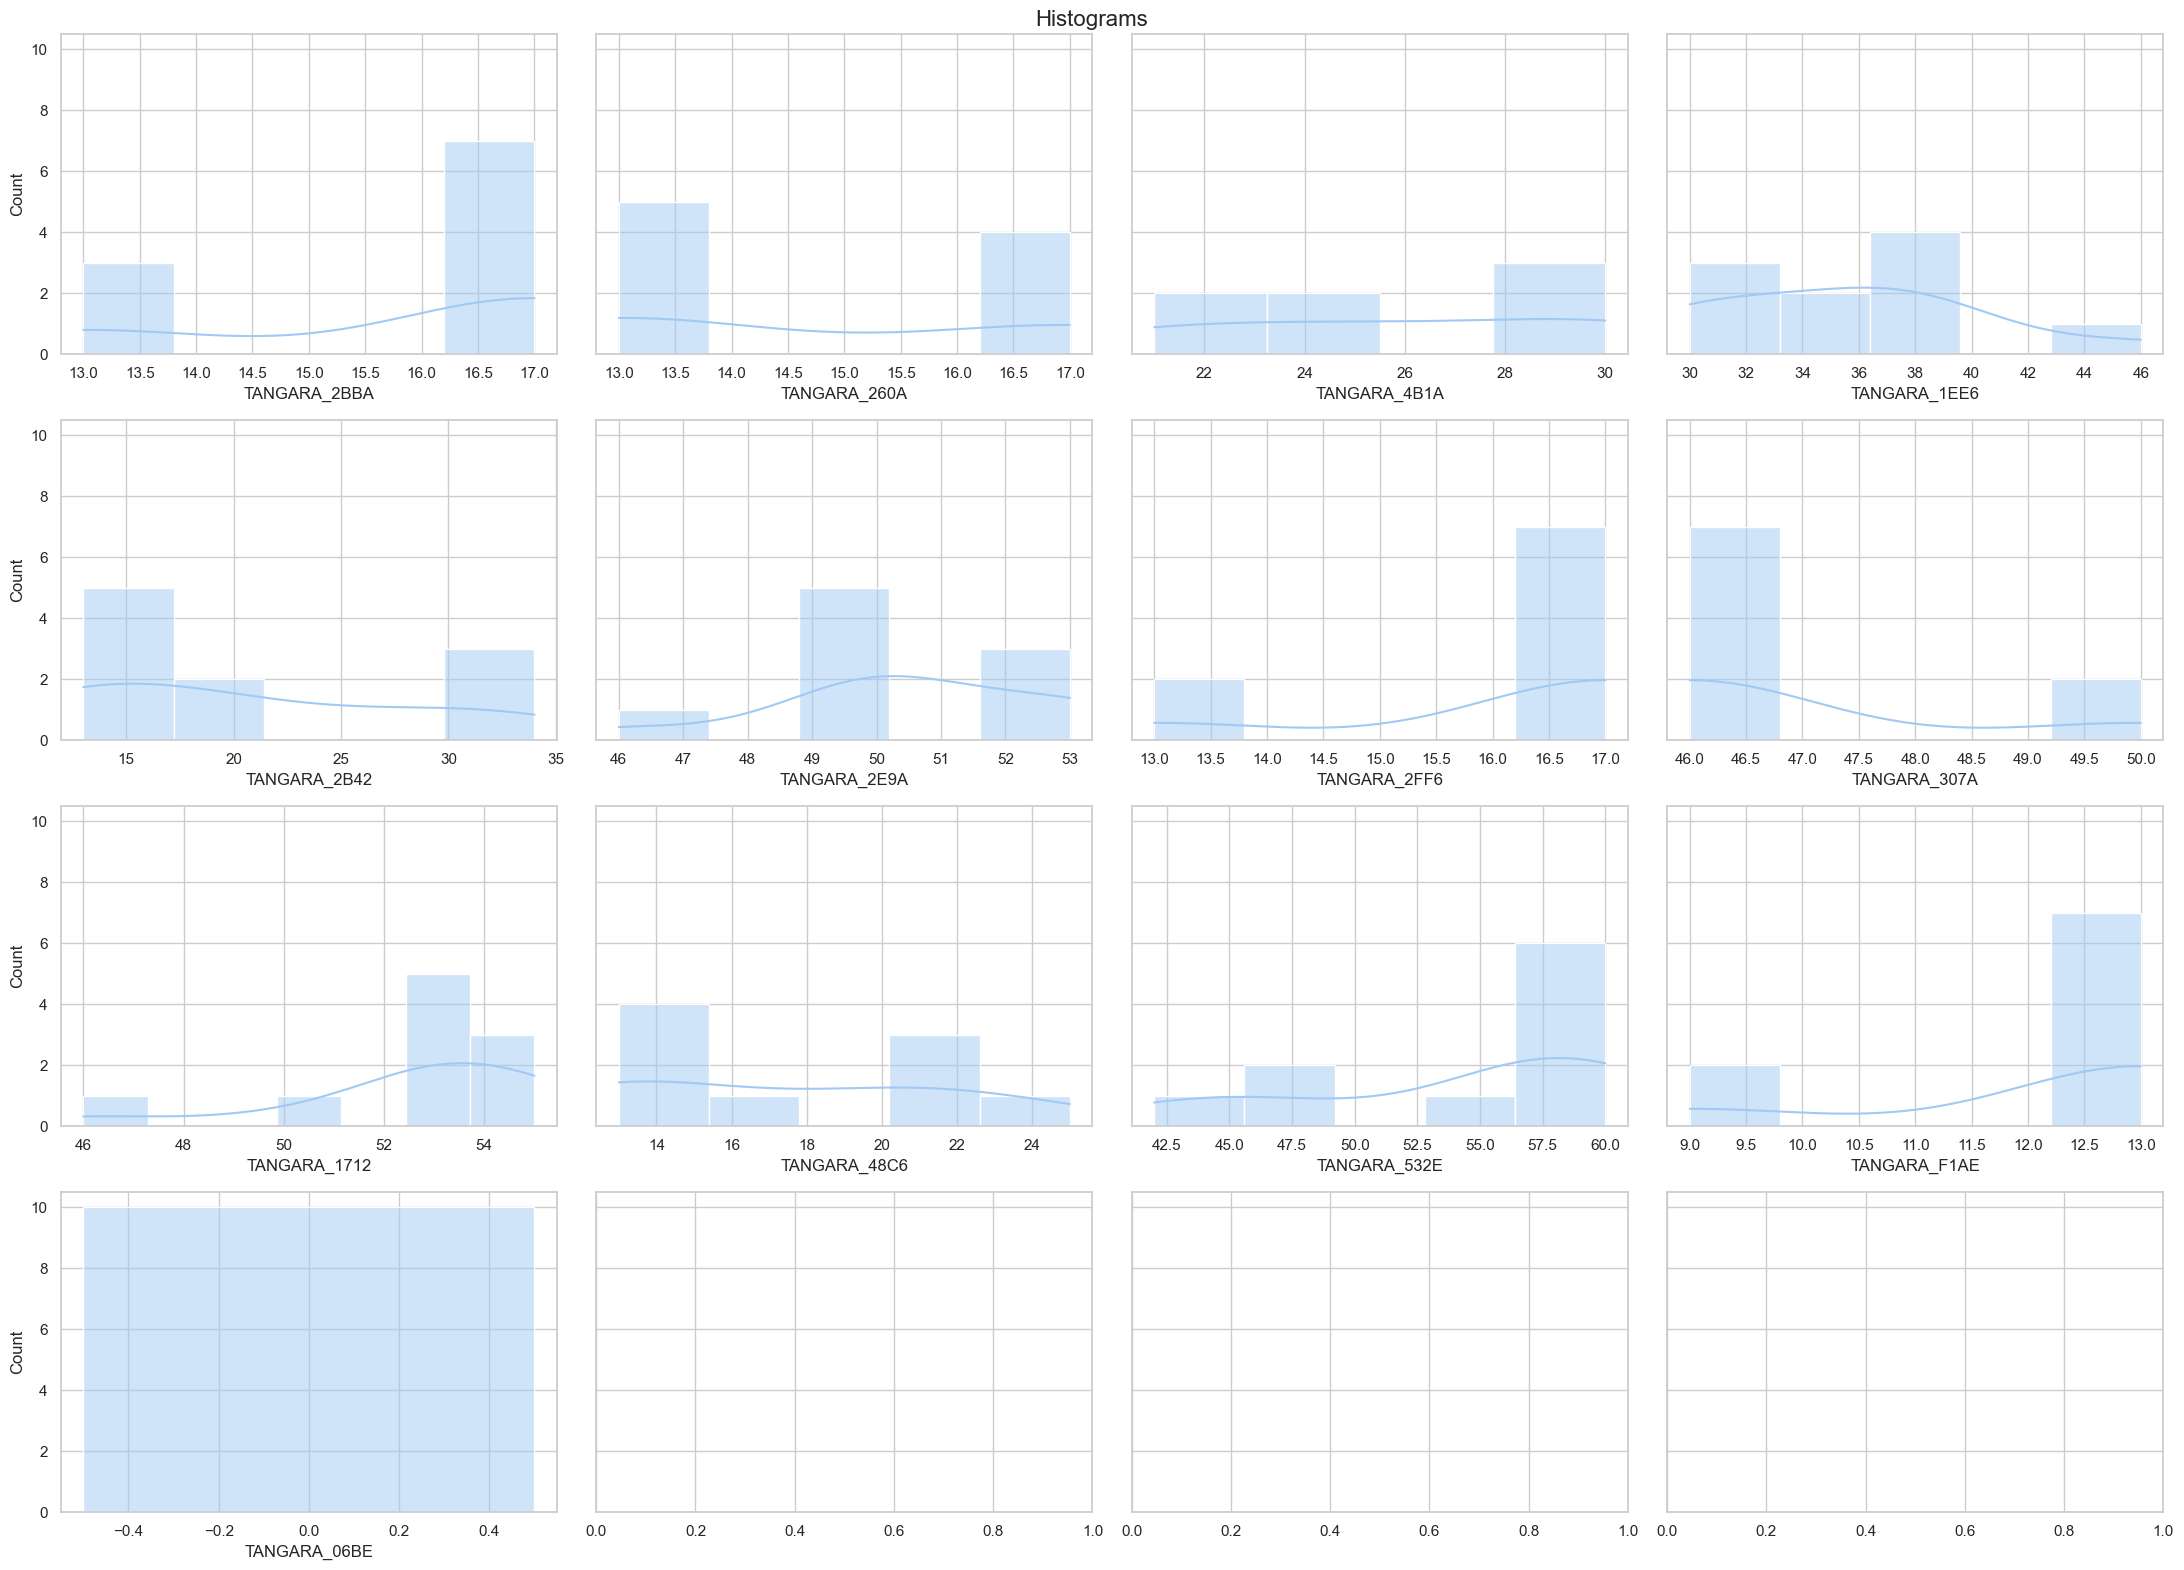

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

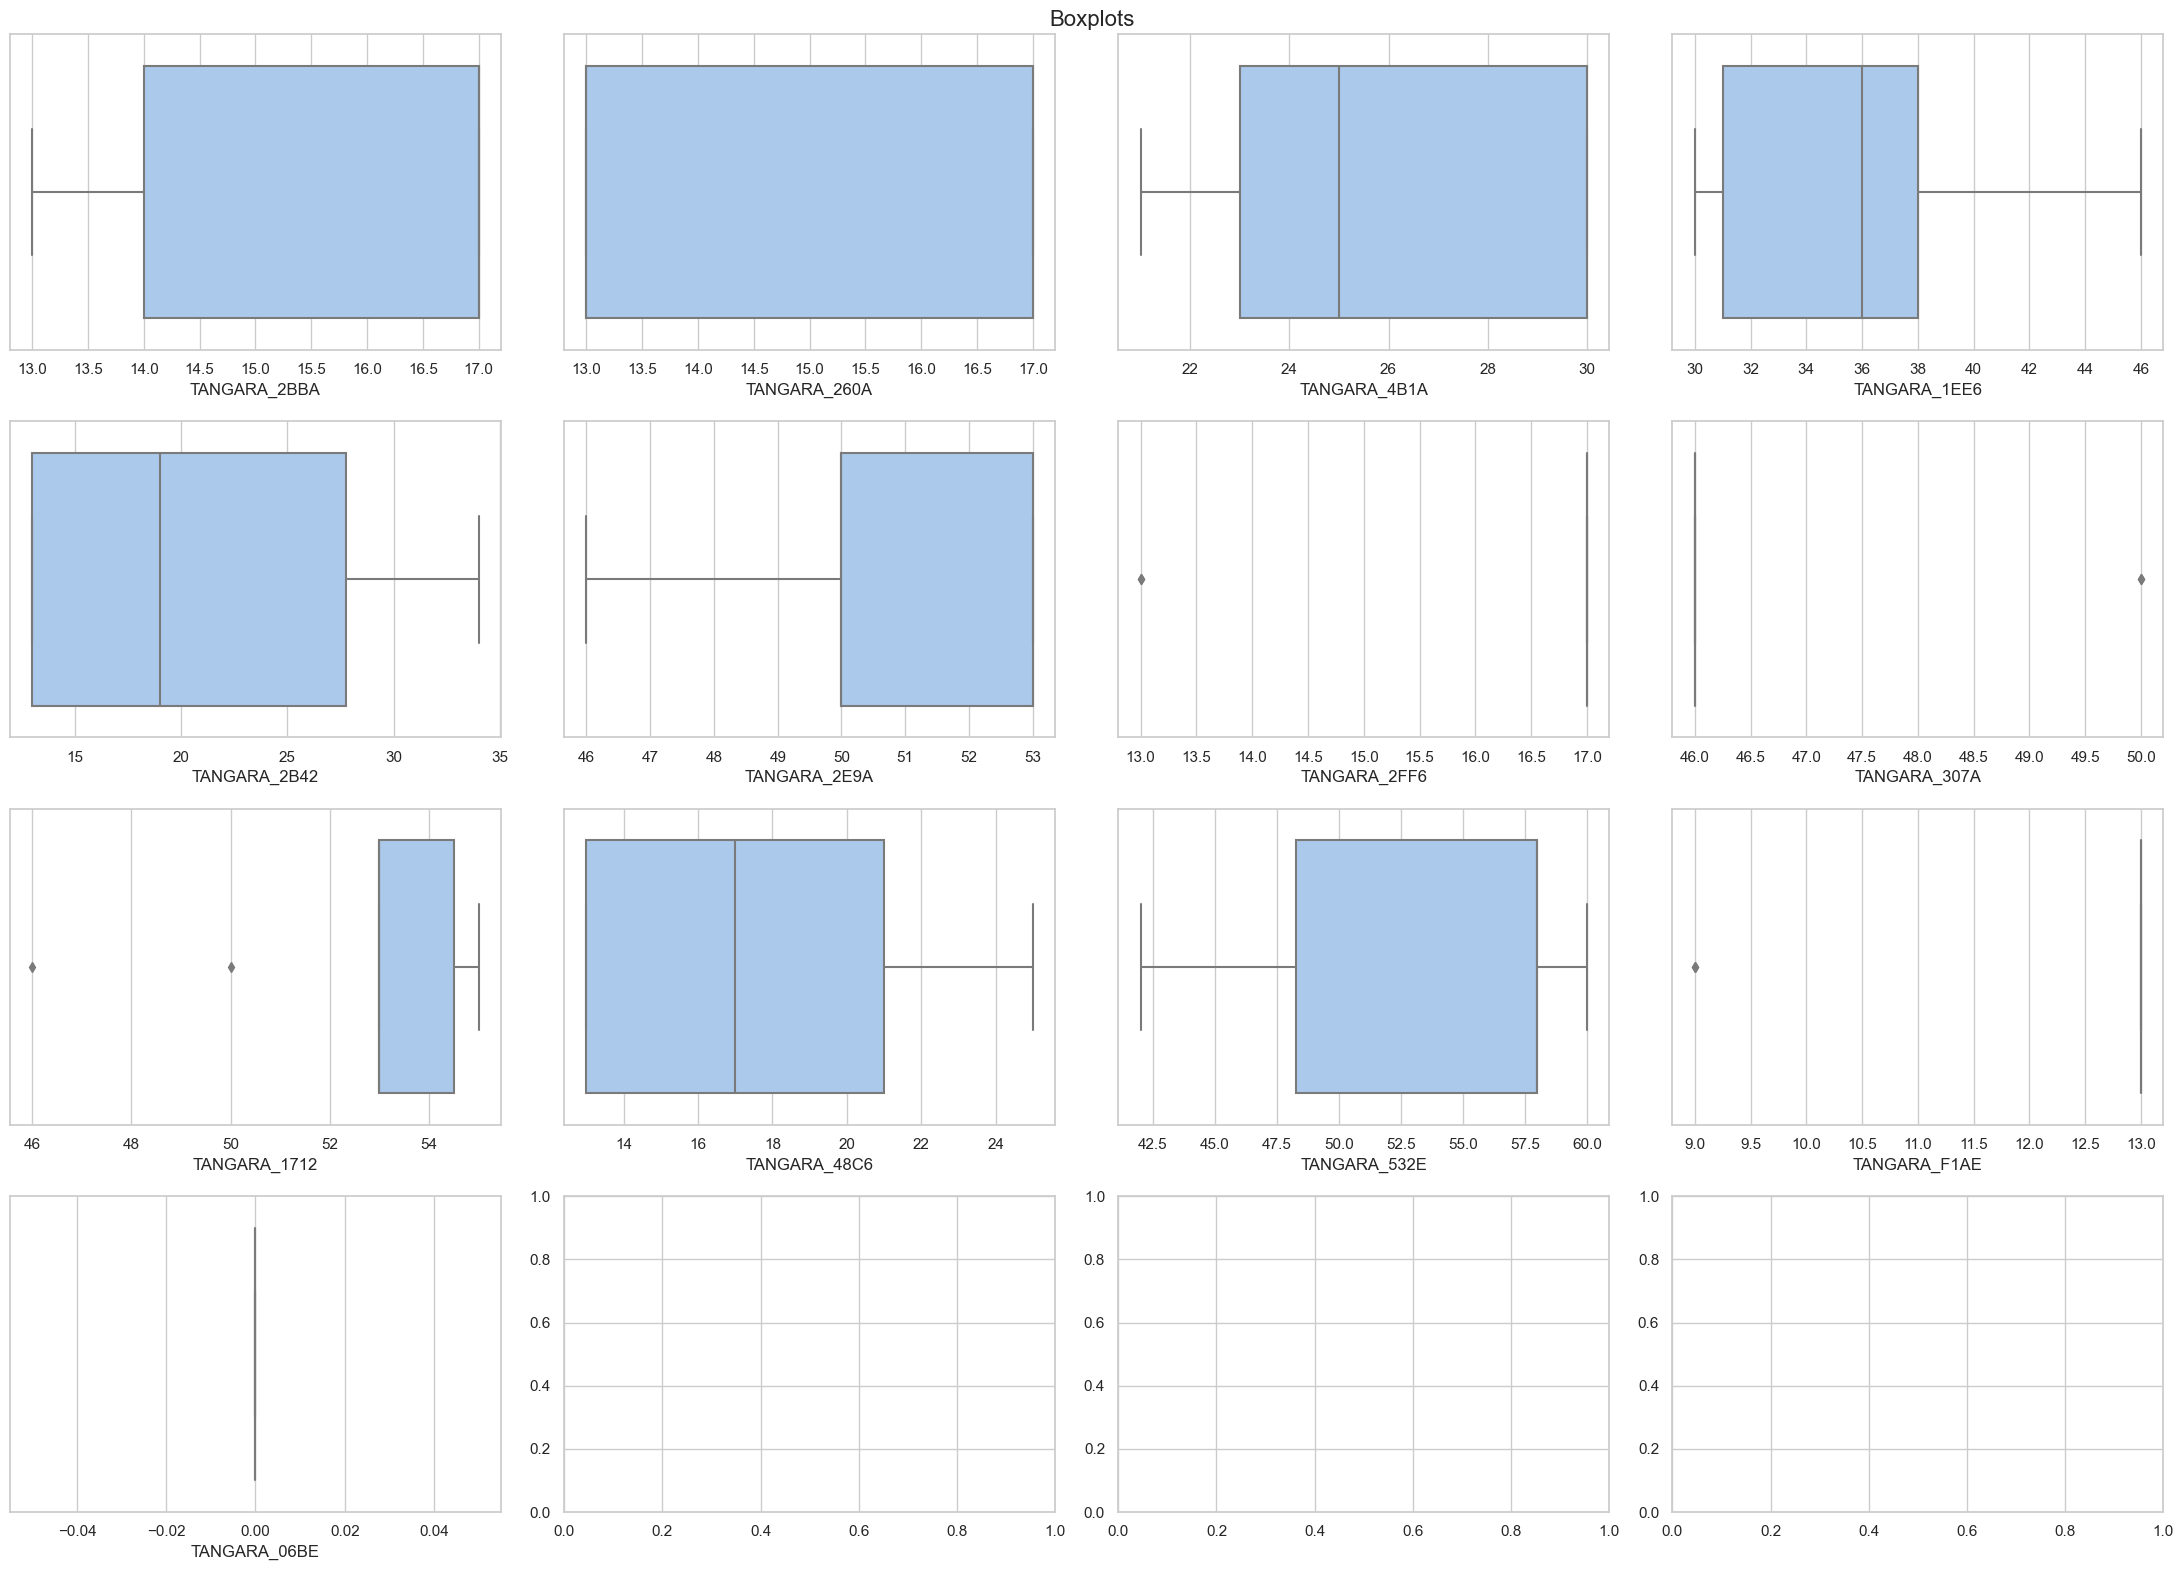

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

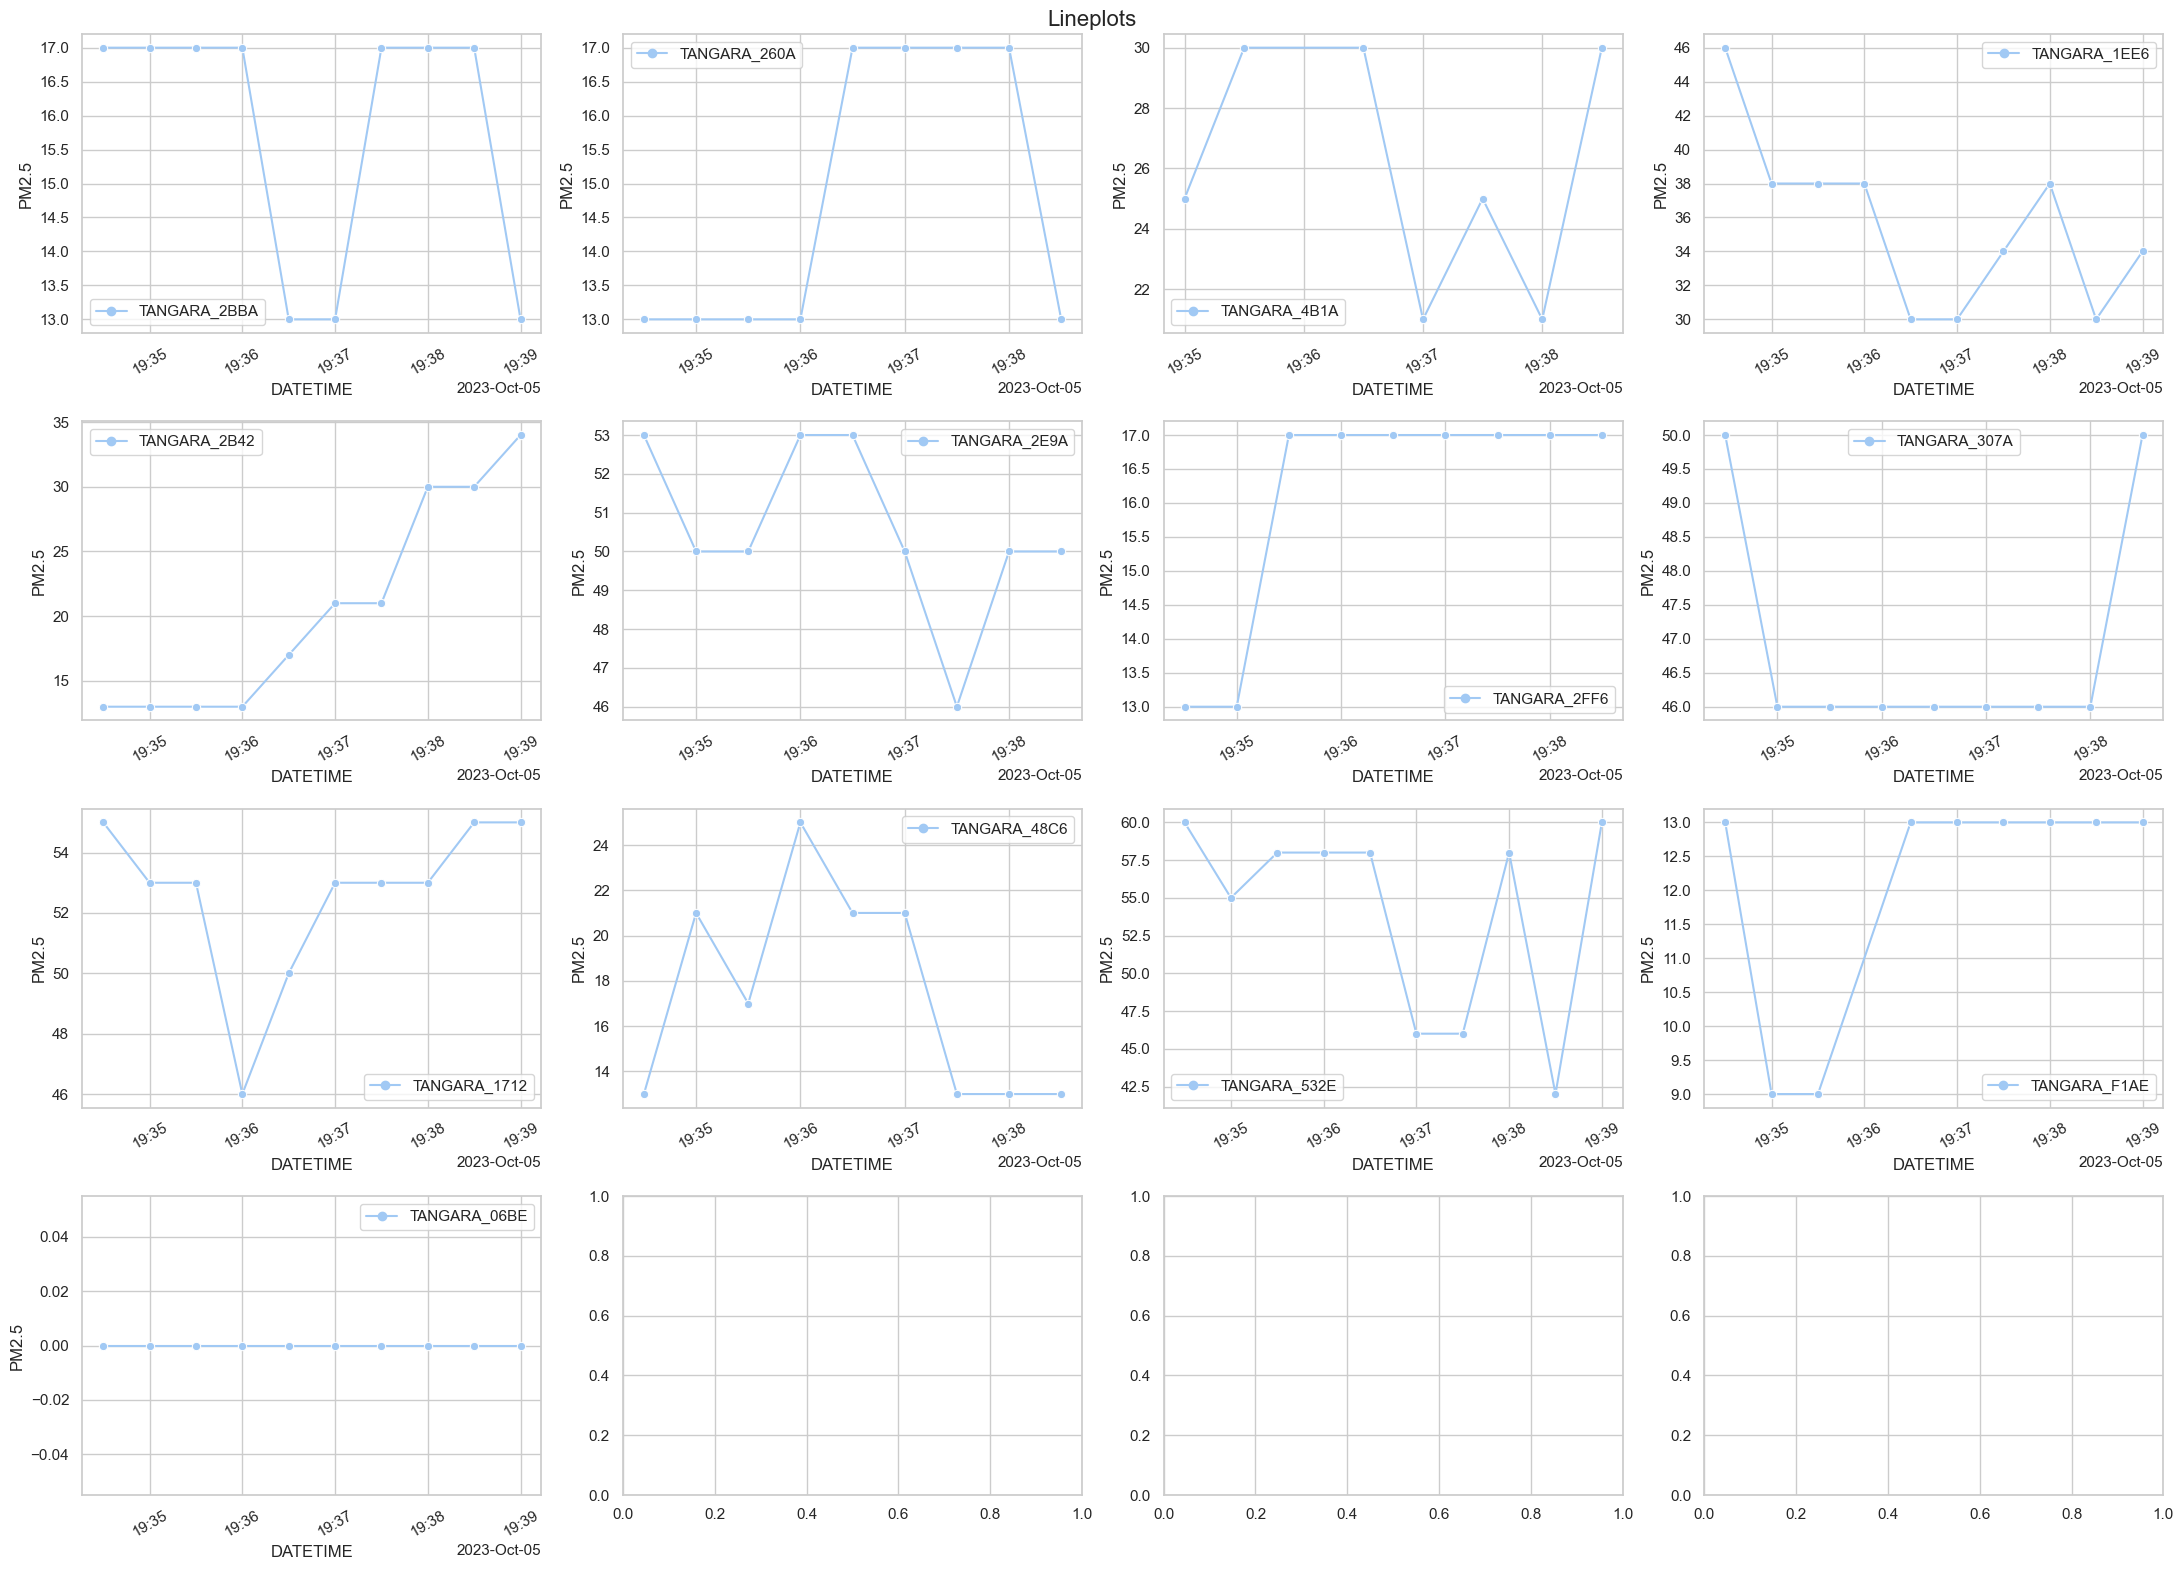

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')